## Estimate Home Values in Zillow

Faith Kane
10/18/2019

### Goals:

### Import Modules:

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt


import env
import util
import wrangle_zillow
import split_scale_zillow
import features_zillow
import model_zillow

#### Read In, Clean, and Transform the Data Using wrangle_zillow()

In [2]:
df = wrangle_zillow.wrangle_zillow()

/Users/faith/codeup-data-science/ds-methodologies-exercises/zillow_project/wrangle_zillow.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["fips_number"] = df["fips_number"].astype(int)
/Users/faith/codeup-data-science/ds-methodologies-exercises/zillow_project/wrangle_zillow.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["propertylandusedesc"] = df["propertylandusedesc"].astype("category")
/Users/faith/codeup-data-science/ds-methodologies-exercises/zillow_project/wrangle_zillow.py:38: SettingWithCopyWarning: 
A value is tryi

#### Summarize the Data Using tell_me_about(df)

In [3]:
util.tell_me_about(df)

DataFrame Shape:

(15947, 8)

Info about:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15947 entries, 0 to 15955
Data columns (total 8 columns):
bedrooms               15947 non-null float64
bathrooms              15947 non-null float64
square_feet            15947 non-null int64
taxes                  15947 non-null float64
home_value             15947 non-null float64
propertylandusedesc    15947 non-null category
fips_number            15947 non-null int64
zip_code               15947 non-null category
dtypes: category(2), float64(4), int64(2)
memory usage: 931.8 KB
None

Describe:

           bedrooms     bathrooms   square_feet          taxes    home_value  \
count  15947.000000  15947.000000  15947.000000   15947.000000  1.594700e+04   
mean       3.253026      2.215213   1836.276729    5680.471976  4.632920e+05   
std        0.949431      1.025248    980.727638    7466.513817  6.434062e+05   
min        1.000000      1.000000    320.000000      49.180000  1.216800e+04   
2

#### Split the Data Using split_my_data(df) and Assign Features (x) and Target (y)

In [4]:
train, test = split_scale_zillow.split_my_data(df)

In [5]:
x_train = train[["bedrooms", "bathrooms", "square_feet"]]
y_train = train[["home_value"]]
x_test = test[["bedrooms", "bathrooms", "square_feet"]]
y_test = test[["home_value"]]

In [26]:
s_train = train[["square_feet"]]
s_test = test[["square_feet"]]

In [21]:
# xz_train = train[["bedrooms", "bathrooms", "square_feet", "zip_code"]]
# xz_test = test[["bedrooms", "bathrooms", "square_feet", "zip_code"]]

### Scale the Data Using the Standard Scaler

In [6]:
scaler, x_train_scaled, x_test_scaled = split_scale_zillow.iqr_robust_scaler(x_train, x_test)
x_train = x_train_scaled
x_test = x_test_scaled
print(x_train.head())
print(x_test.head())

       bedrooms  bathrooms  square_feet
1659        1.0        1.0     1.423913
14101       0.0        0.0    -0.219565
4532        1.0        1.0     1.115217
4941        0.0        1.0     0.502174
15431      -1.0       -1.0    -0.375000
       bedrooms  bathrooms  square_feet
5402        1.0        1.0     0.583696
15625      -1.0        0.0    -0.691304
5300        0.0        0.0    -0.179348
11455       0.0        0.0     0.238043
8110        0.0        0.0    -0.052174


In [27]:
scaler, s_train_scaled, s_test_scaled = split_scale_zillow.standard_scaler(s_train, s_test)
s_train_scaled.head()

,square_feet
1659,1.083199
14101,-0.453953
4532,0.794475
4941,0.221093
15431,-0.599332


In [28]:
# scaler, xz_train_scaled, xz_test_scaled = split_scale_zillow.standard_scaler(xz_train, xz_test)
# xz_train_scaled.head()

### Explore the Data: 

I visualized the correlation between features

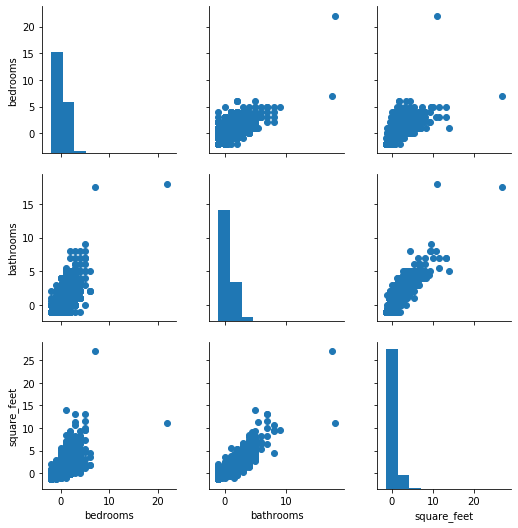

In [7]:
g = sns.PairGrid(x_train_scaled)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [29]:
# g = sns.PairGrid(xz_train_scaled)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)

### Create Baseline Linear Regression Model Using modeling_function()

In [8]:
predictions = model_zillow.modeling_function(x_train, y_train)
predictions

,actual,lm1,baseline
0,1252995.0,8.854281e+05,461061.036921
1,192960.0,2.790148e+05,461061.036921
2,616795.0,7.531964e+05,461061.036921
3,470103.0,6.318750e+05,461061.036921
4,361585.0,3.100143e+05,461061.036921
5,484848.0,4.154370e+05,461061.036921
6,224616.0,2.113007e+05,461061.036921
7,634400.0,2.191582e+06,461061.036921
8,537645.0,1.113438e+06,461061.036921
9,193757.0,2.822741e+05,461061.036921


In [30]:
#model 2
lm2=LinearRegression()
lm2.fit(s_train_scaled, y_train)
lm2_predictions=lm2.predict(s_train_scaled)
predictions['lm2']=lm2_predictions

In [31]:
predictions.head()

,actual,lm1,baseline,lm2
0,1252995.0,885428.134588,461061.036921,907281.099411
1,192960.0,279014.832467,461061.036921,274056.843455
2,616795.0,753196.413153,461061.036921,788342.151864
3,470103.0,631875.015836,461061.036921,552139.453214
4,361585.0,310014.300220,461061.036921,214168.570570


#### Evaluate:  Compare Model Performance Metrics

The Baseline Model Evaluation Metrics:

-The baseline model evaluation reveals an $R^2$ value of 0. I will use this value to compare with the $R^2$ values of my two linear regression models below. I want to find out if the models can predict home values better than just using the mean of all the home values.

In [9]:
MSE_baseline = mean_squared_error(predictions.actual, predictions.baseline)
SSE_baseline = MSE_baseline*len(predictions.actual)
RMSE_baseline = sqrt(MSE_baseline)
r2_baseline = r2_score(predictions.actual, predictions.baseline)
print(MSE_baseline,SSE_baseline,RMSE_baseline,r2_baseline)

408099934360.68744 5206130862639290.0 638826.998772506 0.0


The Linear Regression Models Evaluation Metrics:

-The linear regression model including bedroom count, bathroom count, and square feet as features returned a $R^2$ value of .4278

-The linear regression model including square feet as the sole feature returned a $R^2$ value of .4158.


In [33]:
MSE_1 = mean_squared_error(predictions.actual, predictions.lm1)
SSE_1 = MSE_1*len(predictions.actual)
RMSE_1 = sqrt(MSE_1)
r2_1 = r2_score(predictions.actual, predictions.lm1)
print(MSE_1,SSE_1,RMSE_1,r2_1)

228289509754.3348 2912289275936049.0 477796.51500857016 0.44060390474709654


In [32]:
MSE_2 = mean_squared_error(predictions.actual, predictions.lm2)
SSE_2 = MSE_2*len(predictions.actual)
RMSE_2 = sqrt(MSE_2)
r2_2 = r2_score(predictions.actual, predictions.lm2)
print(MSE_2,SSE_2,RMSE_2,r2_2)

238400129342.4358 3041270450021453.5 488262.3570811452 0.4158290426684248


#### Side-by-Side Comparison of Evaluation Metrics:

In [36]:
df_eval = pd.DataFrame(np.array(["SSE","MSE","RMSE", "R2"]), columns=["metric"])
df_eval["model_1_error"] = np.array([SSE_1, MSE_1, RMSE_1, r2_1])
df_eval["baseline_error"] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline, r2_baseline])
df_eval["error_delta_1"] = df_eval.model_1_error - df_eval.baseline_error
df_eval["model_2_error"] = np.array([SSE_2, MSE_2, RMSE_2, r2_2])
df_eval["error_delta_2"] = df_eval.model_2_error - df_eval.baseline_error
df_eval

,metric,model_1_error,baseline_error,error_delta_1,model_2_error,error_delta_2
0,SSE,2.912289e+15,5.206131e+15,-2.293842e+15,3.041270e+15,-2.164860e+15
1,MSE,2.282895e+11,4.080999e+11,-1.798104e+11,2.384001e+11,-1.696998e+11
2,RMSE,4.777965e+05,6.388270e+05,-1.610305e+05,4.882624e+05,-1.505646e+05
3,R2,4.406039e-01,0.000000e+00,4.406039e-01,4.158290e-01,4.158290e-01


#### Create a Field that Calculates the Tax Rate:

In [12]:
df["tax_rate"] = df["taxes"] / df["home_value"]
df.head()

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,zip_code,tax_rate
0,4.0,2.0,1604,6089.82,498347.0,Single Family Residential,6037,96415.0,0.012220
1,3.0,3.0,2384,6679.55,549917.0,Single Family Residential,6037,96452.0,0.012146
2,3.0,2.0,1574,3876.31,235272.0,Single Family Residential,6037,97319.0,0.016476
3,2.0,2.0,1619,4206.15,340000.0,Single Family Residential,6037,97329.0,0.012371
4,2.0,3.0,2408,24353.42,2017254.0,Single Family Residential,6037,96086.0,0.012073


#### Add the county name to the DataFrame based on the fips number.

In [13]:
df["county_name"] = df["fips_number"].map({6037: "Los Angeles", 6059: "Orange", 6111: "Ventura"})
df.head()

,bedrooms,bathrooms,square_feet,taxes,home_value,propertylandusedesc,fips_number,zip_code,tax_rate,county_name
0,4.0,2.0,1604,6089.82,498347.0,Single Family Residential,6037,96415.0,0.012220,Los Angeles
1,3.0,3.0,2384,6679.55,549917.0,Single Family Residential,6037,96452.0,0.012146,Los Angeles
2,3.0,2.0,1574,3876.31,235272.0,Single Family Residential,6037,97319.0,0.016476,Los Angeles
3,2.0,2.0,1619,4206.15,340000.0,Single Family Residential,6037,97329.0,0.012371,Los Angeles
4,2.0,3.0,2408,24353.42,2017254.0,Single Family Residential,6037,96086.0,0.012073,Los Angeles


### Create Distributions of the Tax Rates by County:

In [14]:
df.groupby("county_name").tax_rate.mean()
df.groupby("county_name").tax_rate.count()

county_name
Los Angeles    12382
Orange          2778
Ventura          787
Name: tax_rate, dtype: int64

In [25]:
df.groupby("zip_code").zip_code.count()

zip_code
95982.0      29
95983.0      47
95984.0      51
95985.0      39
95986.0       8
95987.0       5
95988.0      11
95989.0      43
95992.0      34
95993.0       5
95994.0       1
95997.0      55
95999.0      41
96000.0      36
96001.0       3
96003.0      56
96004.0      22
96005.0      23
96006.0      19
96007.0      51
96008.0      29
96009.0       6
96010.0      13
96012.0      29
96013.0      55
96014.0      18
96015.0      51
96016.0      28
96017.0      23
96018.0      27
96019.0       6
96020.0      46
96021.0      14
96022.0      62
96023.0      69
96024.0      92
96025.0      78
96026.0      89
96027.0      64
96028.0      95
96029.0      24
96030.0      68
96037.0      24
96038.0       3
96039.0       2
96040.0      32
96042.0      38
96043.0      37
96044.0      47
96045.0      64
96046.0      71
96047.0     105
96049.0      52
96050.0      21
96058.0      27
96083.0      29
96086.0      67
96087.0       7
96088.0      10
96090.0      80
96091.0      71
96092.0      47

### Correlation Test

### T-Test